In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 22s 1us/step


each of sequence on train_data have different length but max length on it is 10000

In [33]:
print(train_data.shape)
print(len(train_data[1]))
print(max([max(sequence) for sequence in train_data]))

(25000,)
189
9999


get indexing word to english 

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([
    (value,key) for (key,value) in word_index.items()
])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

1646592/1641221 [==============================] - 3s 2us/step


vectorize data to look like tensor shape (sample, word_indices) and data can train with tensorflow on keras

In [11]:
import numpy as np

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [34]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

build architecture that first layer receive input is 10000 same on how many atrributes have and output layers with node is one using sigmoid, one cause we not to encoding this label

In [36]:
from keras import models
from keras import layers

In [53]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [54]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

split train into validation_data

In [55]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [56]:
history = model.fit(
    partial_x_train, 
    partial_y_train,
    epochs = 20,
    batch_size=512,
    validation_data=(x_val,y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 11s 739us/step - loss: 0.5864 - accuracy: 0.7858 - val_loss: 0.4999 - val_accuracy: 0.8385
Epoch 2/20
15000/15000 [==============================] - 9s 628us/step - loss: 0.4257 - accuracy: 0.8767 - val_loss: 0.4018 - val_accuracy: 0.8586
Epoch 3/20
15000/15000 [==============================] - 6s 376us/step - loss: 0.3304 - accuracy: 0.9001 - val_loss: 0.3418 - val_accuracy: 0.8742
Epoch 4/20
15000/15000 [==============================] - 4s 262us/step - loss: 0.2660 - accuracy: 0.9195 - val_loss: 0.3016 - val_accuracy: 0.8880
Epoch 5/20
15000/15000 [==============================] - 6s 421us/step - loss: 0.2215 - accuracy: 0.9300 - val_loss: 0.2833 - val_accuracy: 0.8900
Epoch 6/20
15000/15000 [==============================] - 4s 265us/step - loss: 0.1889 - accuracy: 0.9401 - val_loss: 0.2781 - val_accuracy: 0.8887
Epoch 7/20
15000/15000 [==============================] - 4s 

get series value from training data

In [57]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

plot data to get where we must have epoch on training which is have minimum loss and maximize accuracy

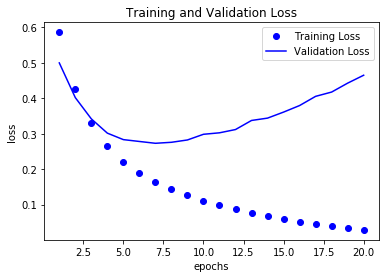

In [58]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

summary by plot with result picture on above, that model we have is overfitting when epoch goes to more than 3. so you can regularize and implement droppout to handle this

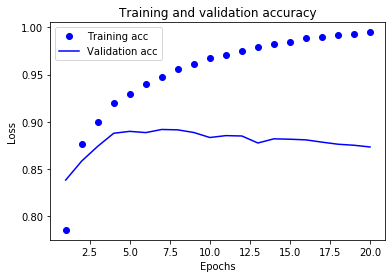

In [60]:
# clear figure
plt.clf() 
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

retrain model that we set the epoch max is 4

In [65]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 13s 515us/step - loss: 0.4781 - accuracy: 0.8134
Epoch 2/4
25000/25000 [==============================] - 5s 186us/step - loss: 0.2794 - accuracy: 0.9076
Epoch 3/4
25000/25000 [==============================] - 4s 160us/step - loss: 0.2124 - accuracy: 0.9270
Epoch 4/4
25000/25000 [==============================] - 13s 507us/step


In [66]:
results

[0.2864657559156418, 0.8847600221633911]

from evaluating model on above we get 88% accuracy data when we heve try to prect on our test data, but we should able to get close to 93%